## 1: Desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um dos agentes a seguir. 

> (A) Agente comentarista de jogo
>
> (B) Agente sugestor de vinho
>
> (C) Agente treinador de time, ex. de basquete

| Agentes | Medida de desempenho | Ambiente | Atuadores | Sensores |
|---------|----------------------|----------|-----------|----------|
| A | Popularidade de seus comentários | Campeonatos, partidas ou noticiários sobre jogos | Comentar, analisar e comparar jogadas, partidas e jogadores | Dados, gravações, áudios do jogo |
| B | Classificação de desempenho pelos clientes | Lojas ou fábricas de vinho | Encaminhar clientes para diferentes tipos de vinho | Histórias, gostos, pedidos do cliente |
| C | Proporção de vitórias/derrotas do time | Clubes de esporte | Condicionar os jogadores, dar diferentes objetivos e rotinas para cumprirem | Estatísticas, resultados de treinos |

## 2: Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

[The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon)

> Aprendizagem supervisionada: Entrega-se um conjunto de dados com resultados conhecidos para que a IA possa reconhecer um padrão que relacione os dados com o resultado e prever um conjunto de dados desconhecido.
> > Entregamos uma parte da base de dados para a IA, treinamos ela e prevemos a parte restante (omitindo o resultado desejado).
>
> Aprendizagem não-supervisionada: Entrega-se um conjunto de dados e a IA tenta agrupá-los de alguma forma, de acordo com suas características em comum. Geralmente necessita de auxílio para interpretar os grupos gerados.
> > Entregamos a base de dados completa para a IA. Ela poderá agrupá-los de várias formas, pokémon lendários, que apresentam fraquezas a tipos X, com "attack" ou "base_total" acima de X, etc.
>
> Aprendizagem semi-supervisionada: Entrega-se um conjunto de dados com resultados conhecidos (poucos) e desconhecidos (muitos) para a IA. Ela agrupa os resultados e supomos que, em um mesmo grupo, os dados desconhecidos são da mesma categoria dos conhecidos.
> > Omitimos o resultado de grande parte do banco de dados e entregamos ele inteiro para a IA.
>
> Aprendizagem por reforço: Determina-se uma medida-alvo a ser atingida e o próprio agente realiza várias repetições a fim de deduzir uma estratégia para atingir cada vez mais/melhor essa medida.
> > Não se aplica à base escolhida.

## 3: Utilize o método k-NN na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação.

### a) Aplique processos necessários para o pré-processamento e execução do método k-NN.

In [1]:
from pandas import read_csv

df = read_csv("databases/pokemon.csv")
df = df.set_index("pokedex_number")

Removendo colunas inúteis:

In [2]:
# Colunas informativas
df = df.drop(df.columns[df.columns.str.contains("against_")], axis=1)
# Colunas de categorização
df = df.drop(["classification", "japanese_name", "name"], axis=1)
# Colunas não mensuráveis
df = df.drop(["abilities", "type1", "type2"], axis=1)

Tratando atributos nulos:

In [3]:
print(df.isnull().sum())

df["height_m"].fillna(df["height_m"].median(), inplace = True)
df["percentage_male"].fillna(0, inplace=True)
df["weight_kg"].fillna(df["weight_kg"].median(), inplace = True)

attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64


Consertando dados (de tipos) errôneos:

In [4]:
print(df.dtypes)

df["capture_rate"] = df["capture_rate"].str.replace(r"\D.*", "", regex=True).astype("int64")

attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
generation             int64
is_legendary           int64
dtype: object


### b) Aplique correlação ou PCA, selecione um número menor de atributos com esses métodos e justifique sua decisão.

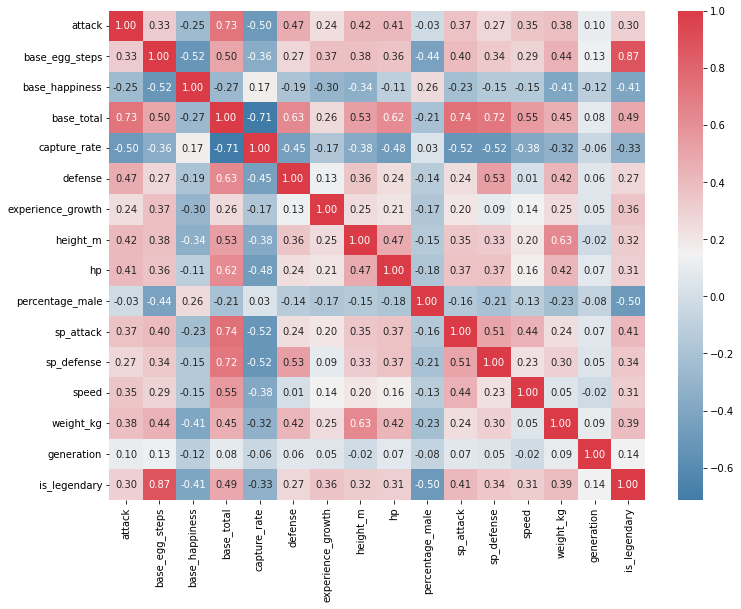

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils.cmap import lukewarm_cmap

# df.corr().style.background_gradient(cmap="coolwarm").format(precision=4)
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap=lukewarm_cmap, annot=True, fmt=".2f")
plt.show()

Podemos retirar as variáveis independentes que têm alta correlação (>= 0,7) entre si, nominalmente: "attack", "capture_rate", "sp_attack" e "sp_defense" em favor de "base_total".

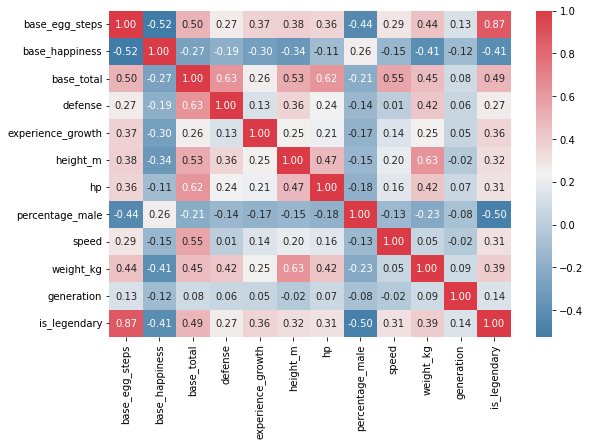

In [6]:
df = df.drop(["attack"], axis=1)
df = df.drop(["capture_rate"], axis=1)
df = df.drop(["sp_attack"], axis=1)
df = df.drop(["sp_defense"], axis=1)

plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), cmap=lukewarm_cmap, annot=True, fmt=".2f")
plt.show()

### c) Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão). Explique os resultados encontrados.

### d) Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.

### e) Aplique k-NN no conjunto de atributos do item 2 usando o melhor k e a melhor métrica de distância.

## 4: Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

Colunas: verdadeiras

Linhas: preditas

| Classes | Maçã | Laranja | Limão | Manga |
|---------|------|---------|-------|-------|
| Maçã    | 70   | 20      | 5     | 5     |
| Laranja | 10   | 67      | 3     | 20    |
| Limão   | 5    | 30      | 55    | 10    |
| Manga   | 5    | 4       | 2     | 1000  |

In [7]:
from math import prod, sqrt
from numpy import mean

apple = {"tp": 70, "tn": 1122, "fp": 30, "fn": 20}
orange = {"tp": 67, "tn": 1125, "fp": 33, "fn": 54}
lemon = {"tp": 55, "tn": 1137, "fp": 45, "fn": 10}
papaya = {"tp": 1000, "tn": 192, "fp": 11, "fn": 35}

In [8]:
def sensitivity(classe: dict[str, int]):
    return classe["tp"] / (classe["tp"] + classe["fn"])

print(f"Sensibilidade: {mean([sensitivity(apple), sensitivity(orange), sensitivity(lemon), sensitivity(papaya)]):.3f}")

Sensibilidade: 0.786


In [9]:
def specificity(classe: dict[str, int]):
    return classe["tn"] / (classe["tn"] + classe["fp"])

print(f"Especificidade: {mean([specificity(apple), specificity(orange), specificity(lemon), specificity(papaya)]):.3f}")

Especificidade: 0.963


In [10]:
def precision(classe: dict[str, int]):
    return classe["tp"] / (classe["tp"] + classe["fp"])

print(f"Precisão: {mean([precision(apple), precision(orange), precision(lemon), precision(papaya)]):.3f}")

Precisão: 0.727


In [11]:
def f1_score(classe: dict[str, int]):
    precisionRecall = [precision(classe), sensitivity(classe)]
    return 2 * (prod(precisionRecall) / sum(precisionRecall))


print(f"Medida F1: {mean([f1_score(apple), f1_score(orange), f1_score(lemon), f1_score(papaya)]):.3f}")

Medida F1: 0.747


In [12]:
def accuracy(classe: dict[str, int]):
    return (classe["tp"] + classe["tn"]) / sum(classe.values())

print(f"Acurácia: {mean([accuracy(apple), accuracy(orange), accuracy(lemon), accuracy(papaya)]):.3f}")

Acurácia: 0.953


In [13]:
def matthews_coef(classe: dict[str, int]):
    return (classe["tp"] * classe["tn"] - classe["fp"] * classe["fn"]) / sqrt((classe["tp"] + classe["fp"]) * (classe["tp"] + classe["fn"]) * (classe["tn"] + classe["fp"]) * (classe["tn"] + classe["fn"]))

print(f"Coeficiente de Matthews: {mean([matthews_coef(apple), matthews_coef(orange), matthews_coef(lemon), matthews_coef(papaya)]):.3f}")

Coeficiente de Matthews: 0.706


In [14]:
def fallOut(classe: dict[str, int]):
    return classe["fp"] / (classe["fp"] + classe["tn"])


def auc(classe: dict[str, int]):
    """
    Area of a triangle + area of a trapezium

    Credits:https://stackoverflow.com/a/50892759/8209582
    """
    # return (sensitivity(classe) - specificity(classe)) / 2
    return 1 / 2 - fallOut(classe) / 2 + sensitivity(classe) / 2


print(f"AUC: {mean([auc(apple), auc(orange), auc(lemon), auc(papaya)]):.3f}")

AUC: 0.875


### Como você resolveria o problema dessa base de dados observando as métricas de avaliação?

## 5: Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.